### 《多頭排列均線回踩策略》

標的：台股 (上市櫃)

進場：當日K棒擊穿10日均線，但仍滿足5/10/20/60均線多頭排列 (隔日開盤買入)

出場：5日均線下穿60日均線 (隔日開盤賣出)

頻率：日策略 

期間：2016-04-08 ~ 2022-12-30

In [1]:
import BBQuant as bbq
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/台股還原_d.ftr')
# df = pd.read_feather('/Users/kuanhsu/Desktop/code/Python/FILE/台股_5m.ftr')

In [2]:
close = bbq.get(df, 'Close')
open = bbq.get(df, 'Open')
low = bbq.get(df, 'Low')
volume = bbq.get(df, 'Volume')

In [3]:
ma_5 = close.average(5)
ma_10 = close.average(10)
ma_20 = close.average(20)
ma_60 = close.average(60)

entries = (ma_5 > ma_10) & (ma_10 > ma_20) & (ma_20 > ma_60) & (low < ma_10).sustain(1) & (low > ma_20) & (low > ma_60)
exits = (ma_5 < ma_60)

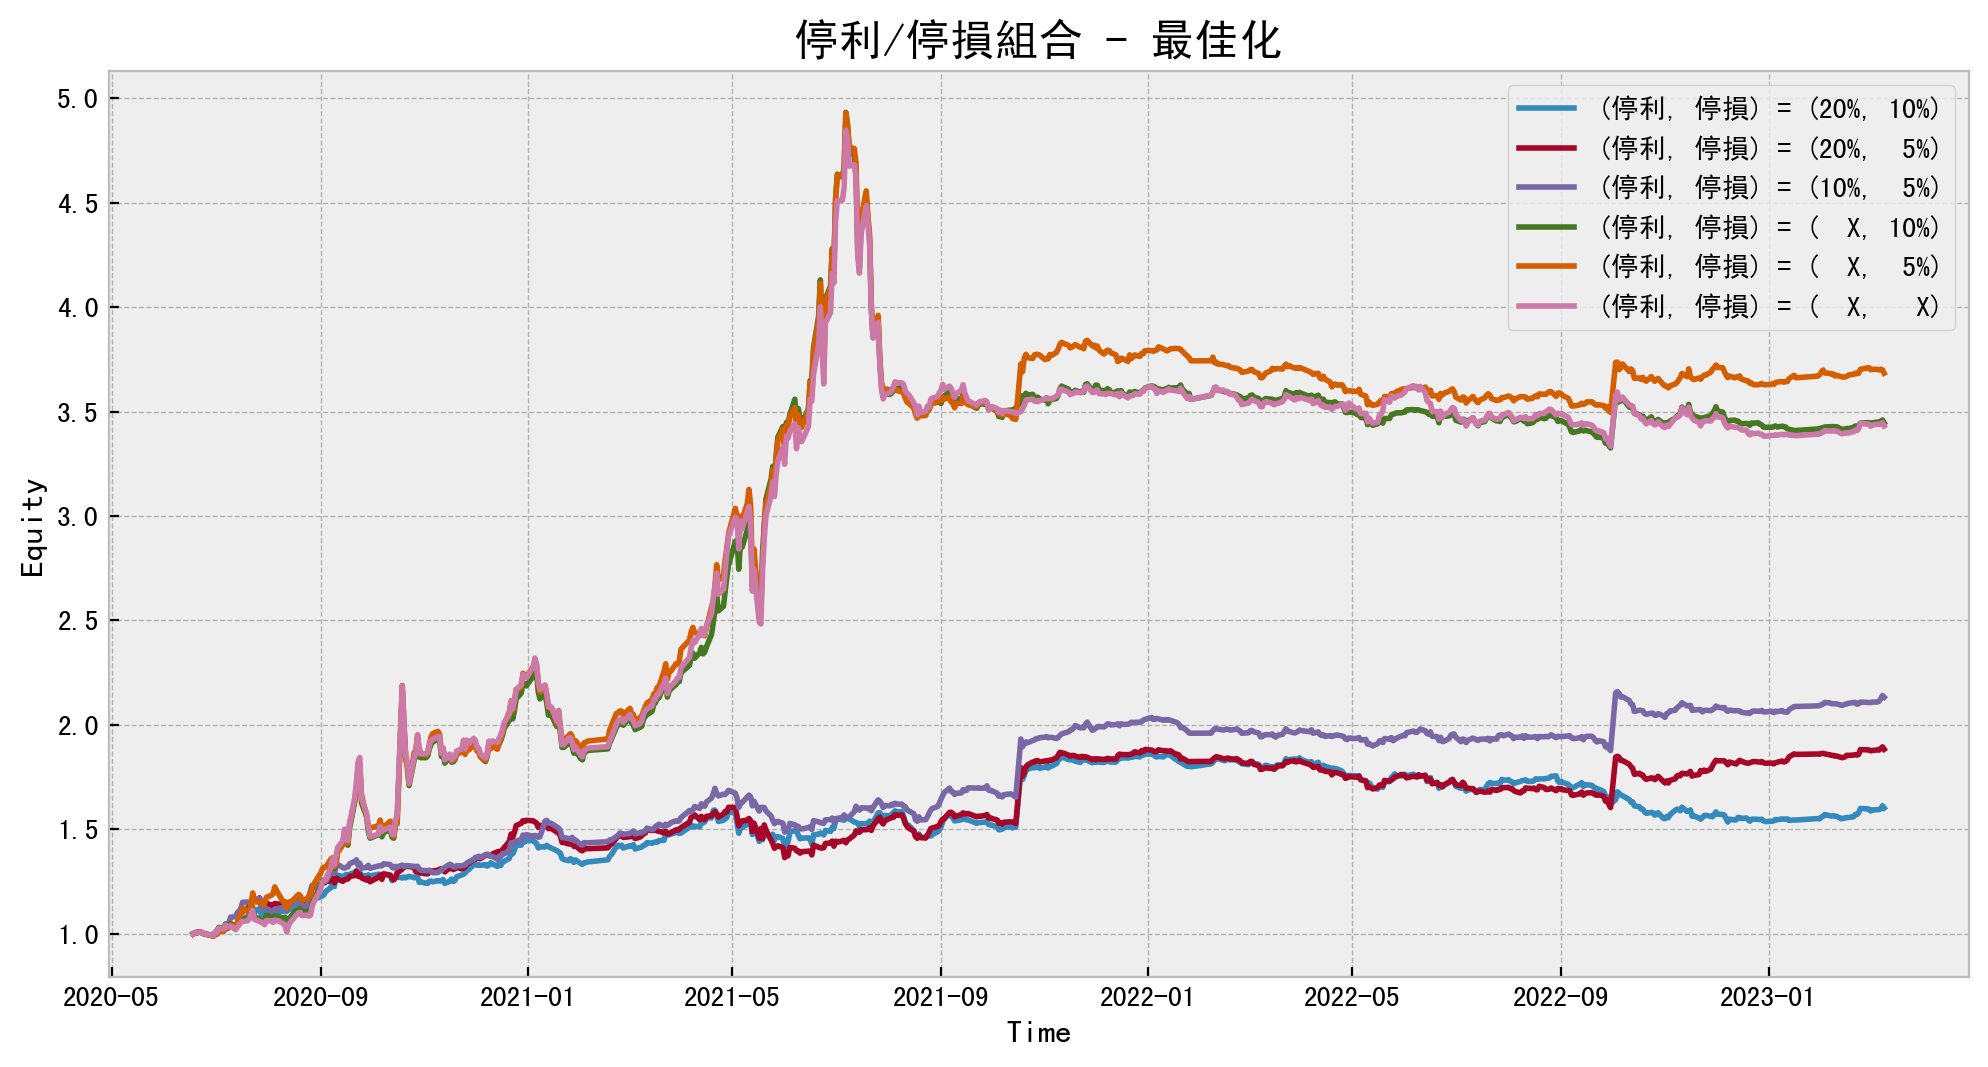

In [10]:
bt = bbq.setting(open, nstocks=10, rank=-close)
bt.optimize(entries, exits, 'stop')

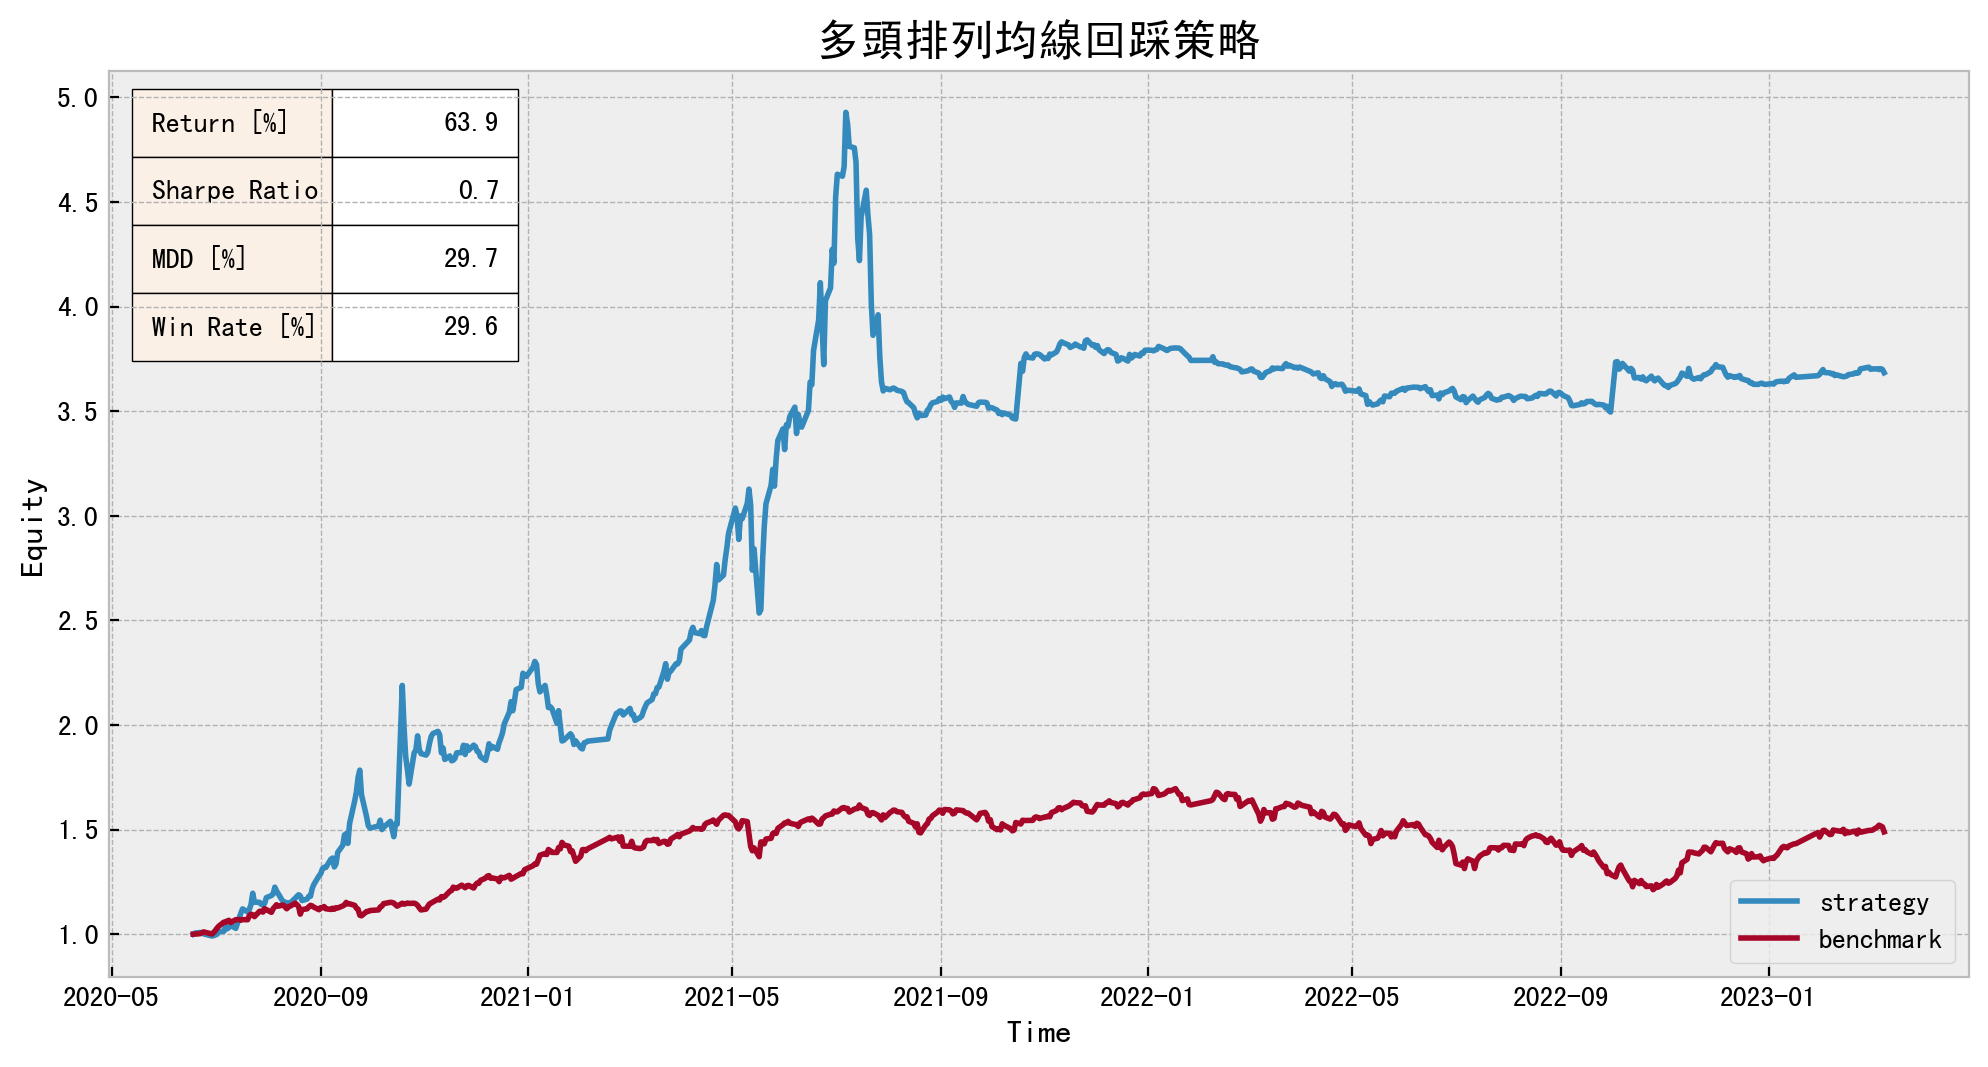

In [11]:
bt = bbq.setting(open, nstocks=10, rank=-close, stop_loss=0.05)
position = bt.strategy(entries, exits)
report = bt.sim(position)
report.plot(name='多頭排列均線回踩策略')

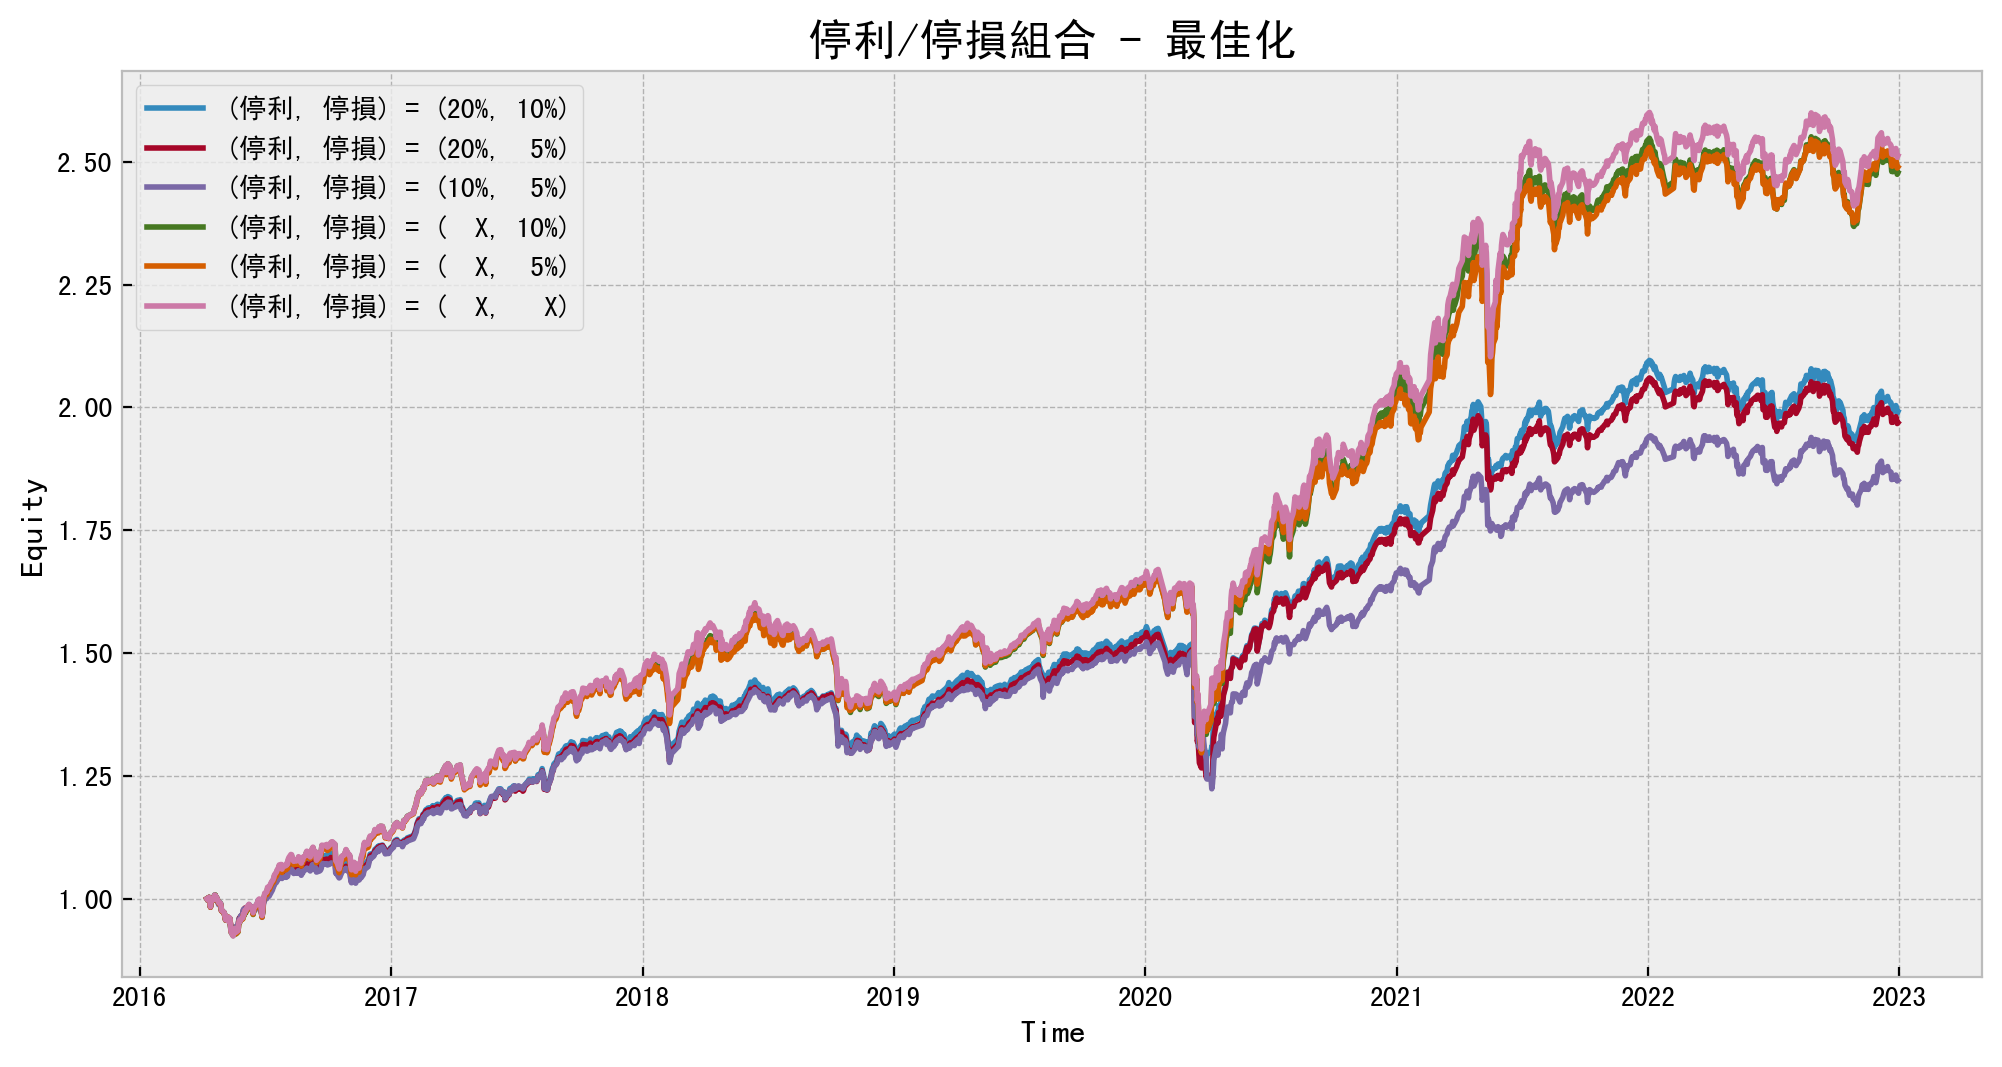

In [4]:
bt = bbq.setting(open)
bt.optimize(entries, exits, type='stop')

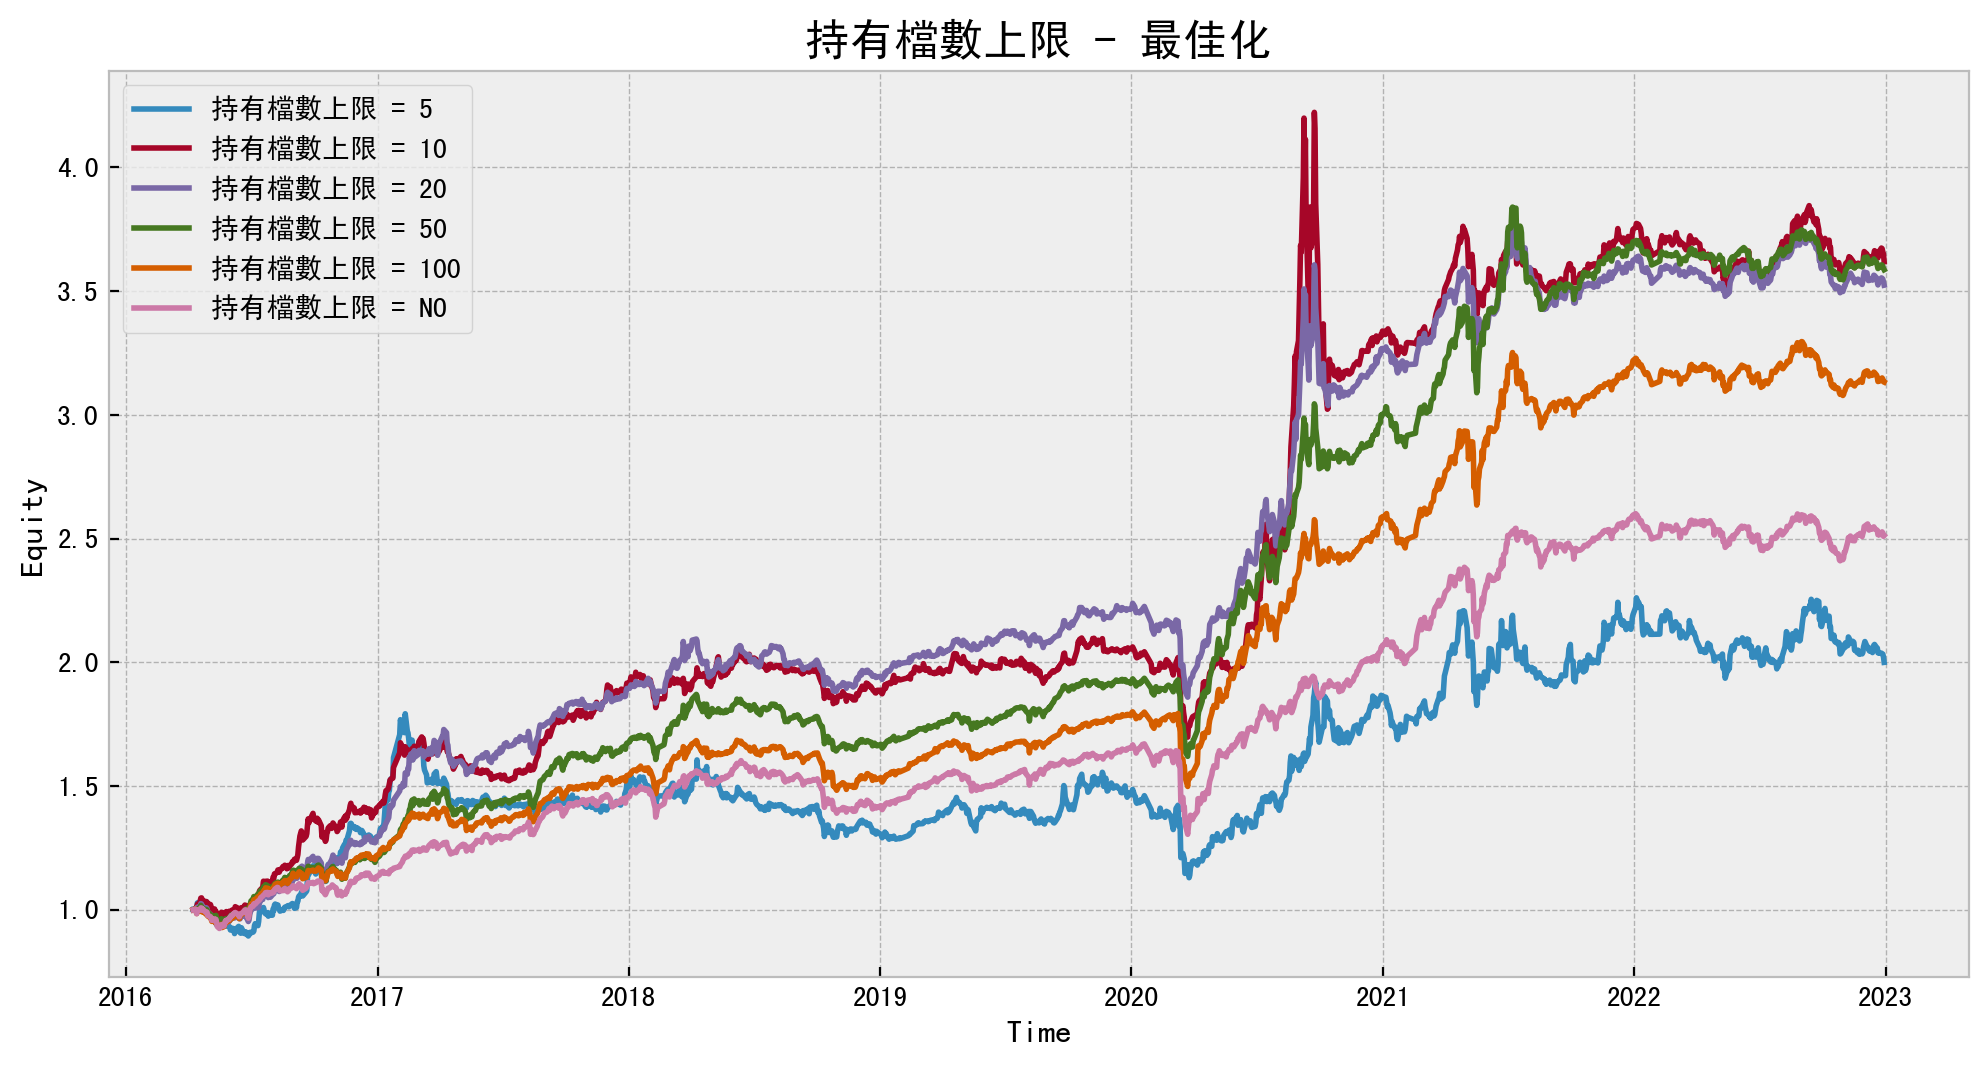

In [5]:
bt = bbq.setting(open, rank=-close)
bt.optimize(entries, exits, type='nstocks')

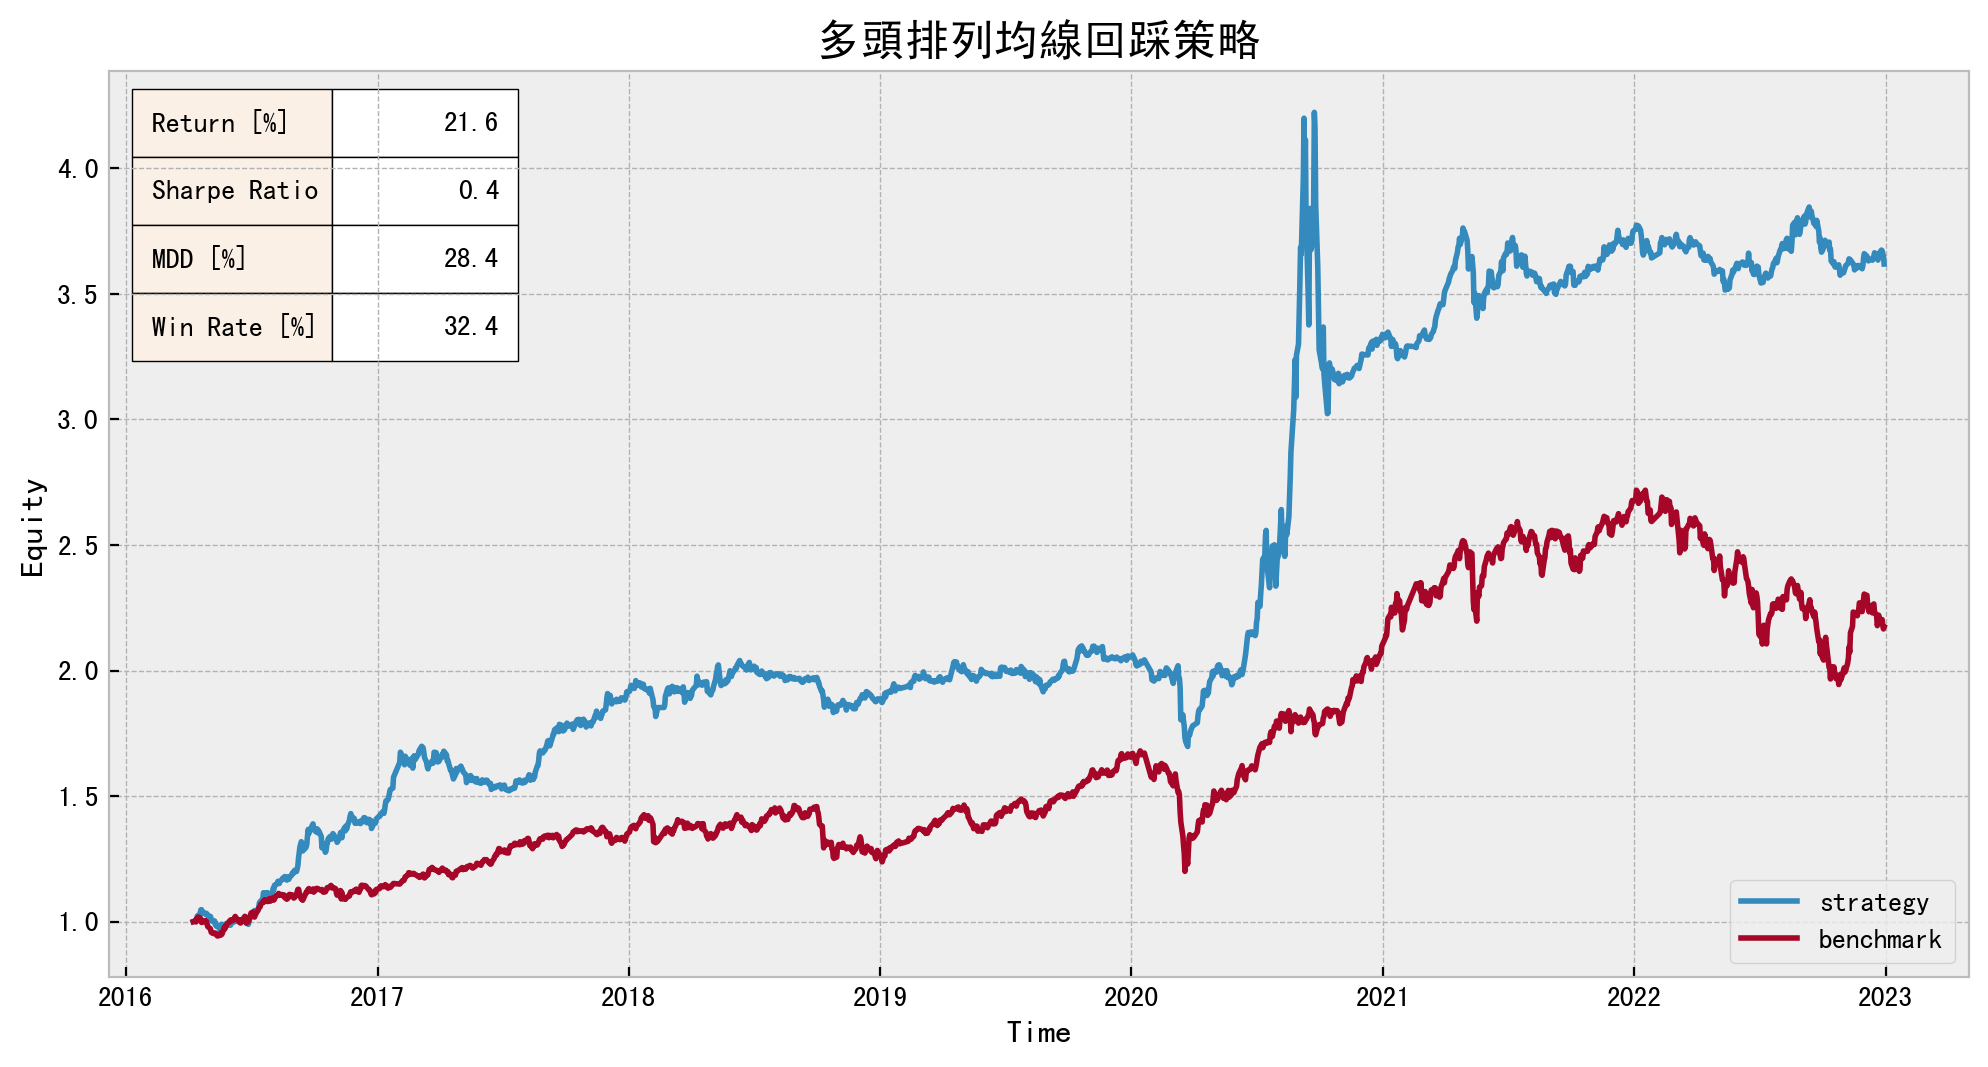

In [9]:
bt = bbq.setting(open, nstocks=10, rank=-close)
position = bt.strategy(entries, exits)
report = bt.sim(position)
report.plot(name='多頭排列均線回踩策略')

In [10]:
report.stats()

Start Date                    2016-04-08
End Date                      2022-12-30
Period [days]                       1654
Win Period [days]                    914
Total Return [%]                  261.85
Total Benchmark Return [%]        117.36
Return [%]                         21.65
Benchmark Return [%]               12.56
Volatility [%]                     52.92
MDD [%]                            28.41
MDD Duration [days]                   19
Total Trades                         407
Win Rate [%]                       32.43
Best Trade [%]                     87.96
Worst Trade [%]                    -3.75
Average Trade [%]                   0.63
Profit Factor                       2.47
Win Loss Ratio                      5.16
Sharpe Ratio                        0.38
Sortino Ratio                       0.42
Calmar Ratio                        0.76
dtype: object

In [12]:
report.trades()

,Asset,Entry Date,Exit Date,Entry Price,Exit Price,Weight,Return
0,2401,2016-04-08,2016-05-09,9.76,9.05,0.100000,-0.007860
1,3021,2016-04-08,2016-05-13,9.68,9.45,0.100000,-0.002961
2,2511,2016-04-08,2016-05-16,7.90,7.01,0.100000,-0.011851
3,1905,2016-04-08,2016-05-17,8.09,7.68,0.111111,-0.006281
4,3550,2016-04-08,2016-05-17,8.48,8.28,0.111111,-0.003271
...,...,...,...,...,...,...,...
402,3276,2022-12-15,2022-12-30,12.25,12.20,0.100000,-0.000993
403,5301,2022-11-10,2022-12-30,10.00,11.20,0.100000,0.011415
404,5345,2022-12-23,2022-12-30,6.40,6.31,0.100000,-0.001991
405,5703,2022-10-05,2022-12-30,18.00,19.35,0.100000,0.006915


In [13]:
report.best_trade()

Asset              911608
Entry Date     2020-05-15
Exit Date      2020-10-14
Entry Price          1.21
Exit Price          11.86
Weight                0.1
Return            0.87958
Name: 246, dtype: object

In [14]:
report.worst_trade()

Asset                4746
Entry Date     2020-03-18
Exit Date      2020-03-23
Entry Price         43.86
Exit Price           32.6
Weight           0.142857
Return          -0.037511
Name: 228, dtype: object

### 《創年新高策略》

標的：台股 (上市櫃)

進場：股價突破近250日高點進場 (隔日開盤買入)

頻率：季策略 

期間：2017-06-30 ~ 2022-12-30

In [15]:
entries = (close == close.maximum(250))

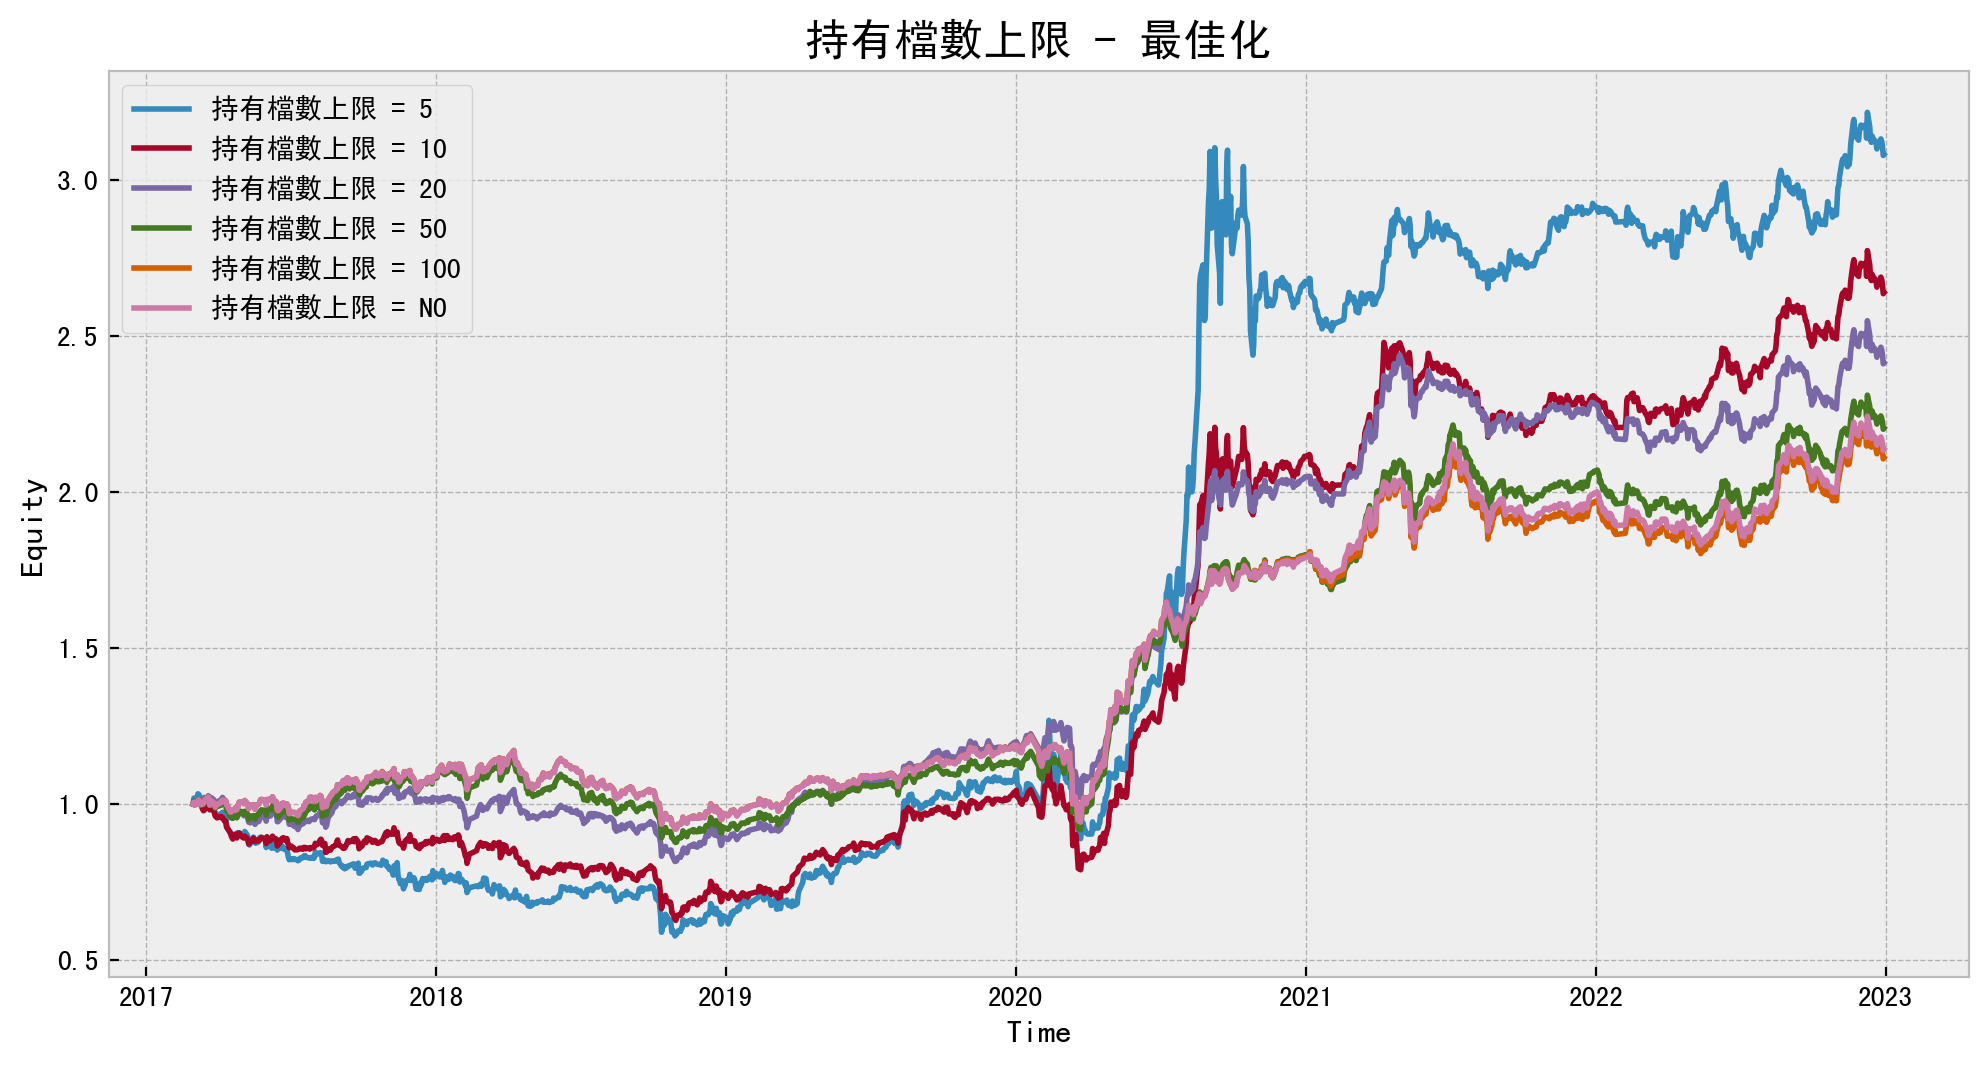

In [22]:
bt = bbq.setting(open, freq='M', rank=-close)
bt.optimize(entries, type='nstocks')

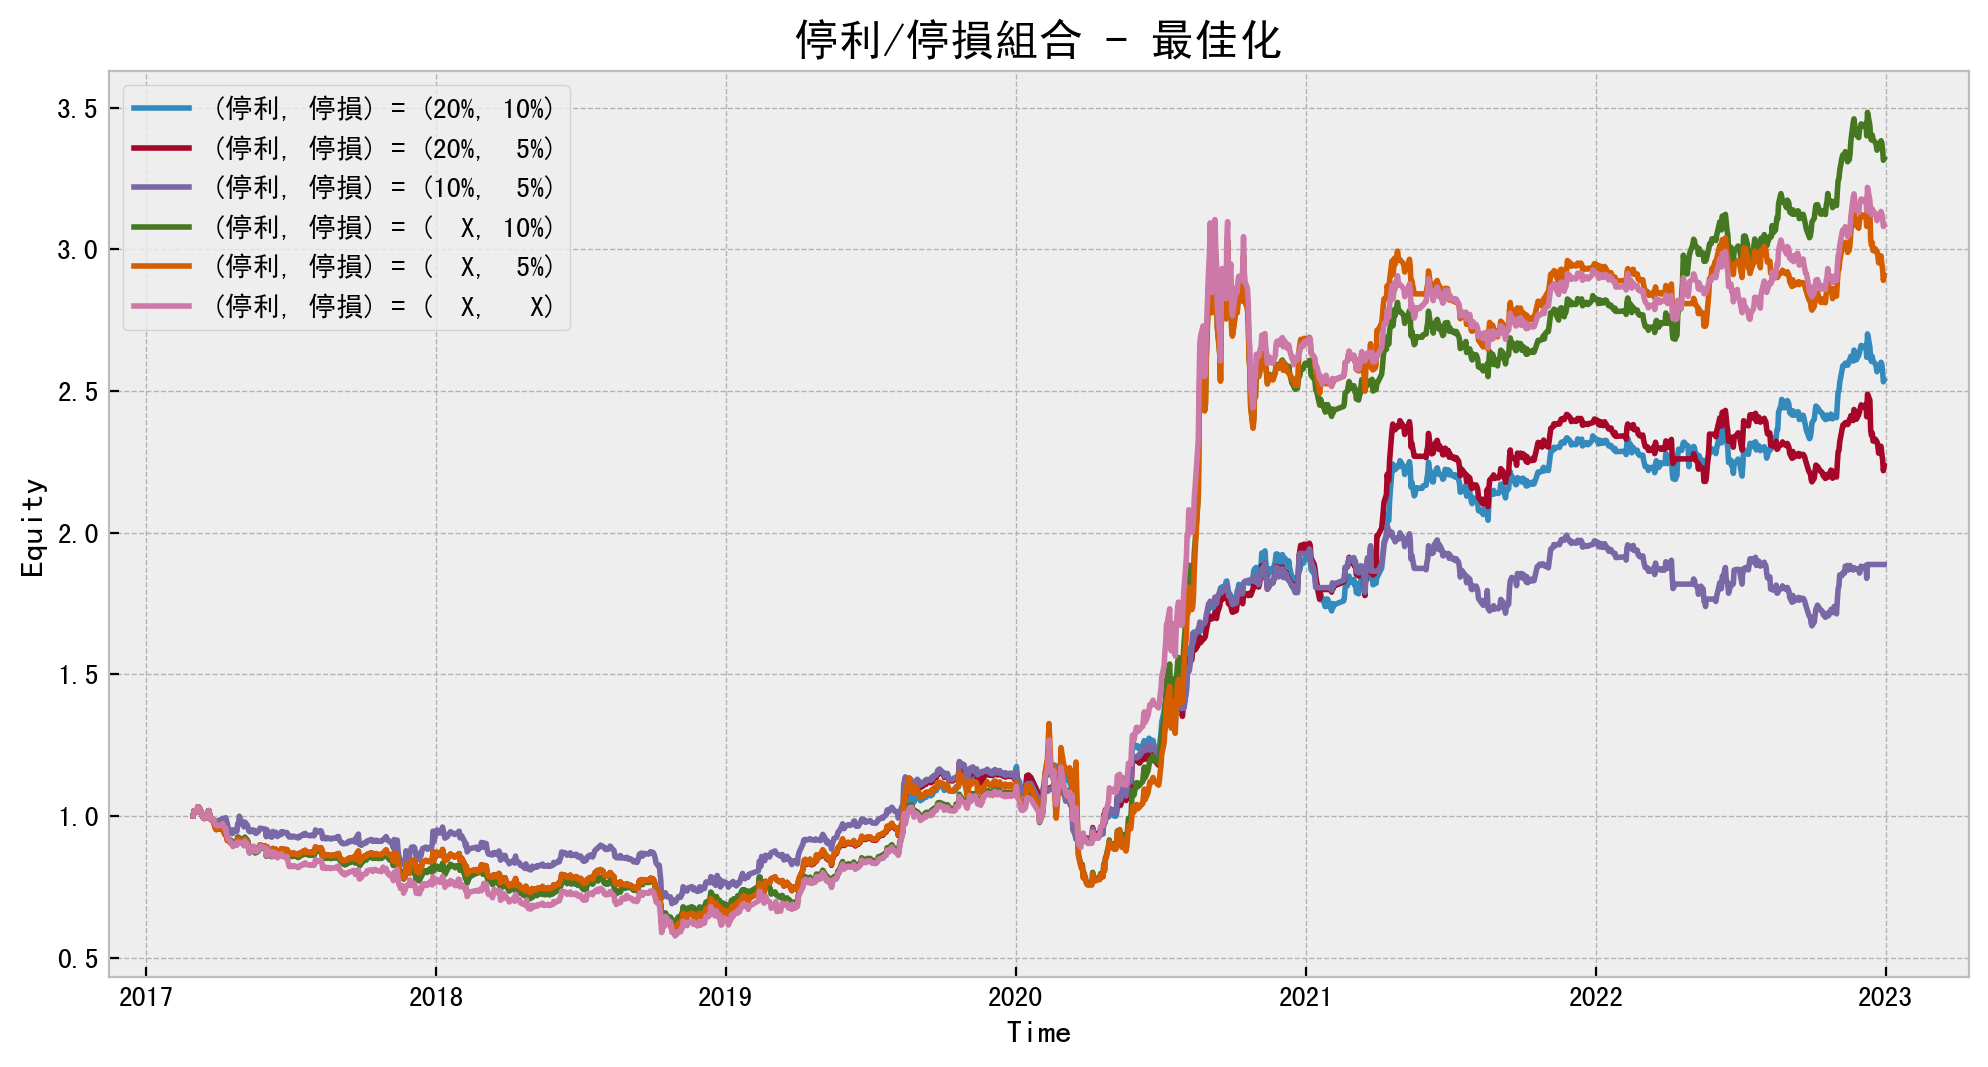

In [23]:
bt = bbq.setting(open, freq='M', nstocks=5, rank=-close)
bt.optimize(entries, type='stop')

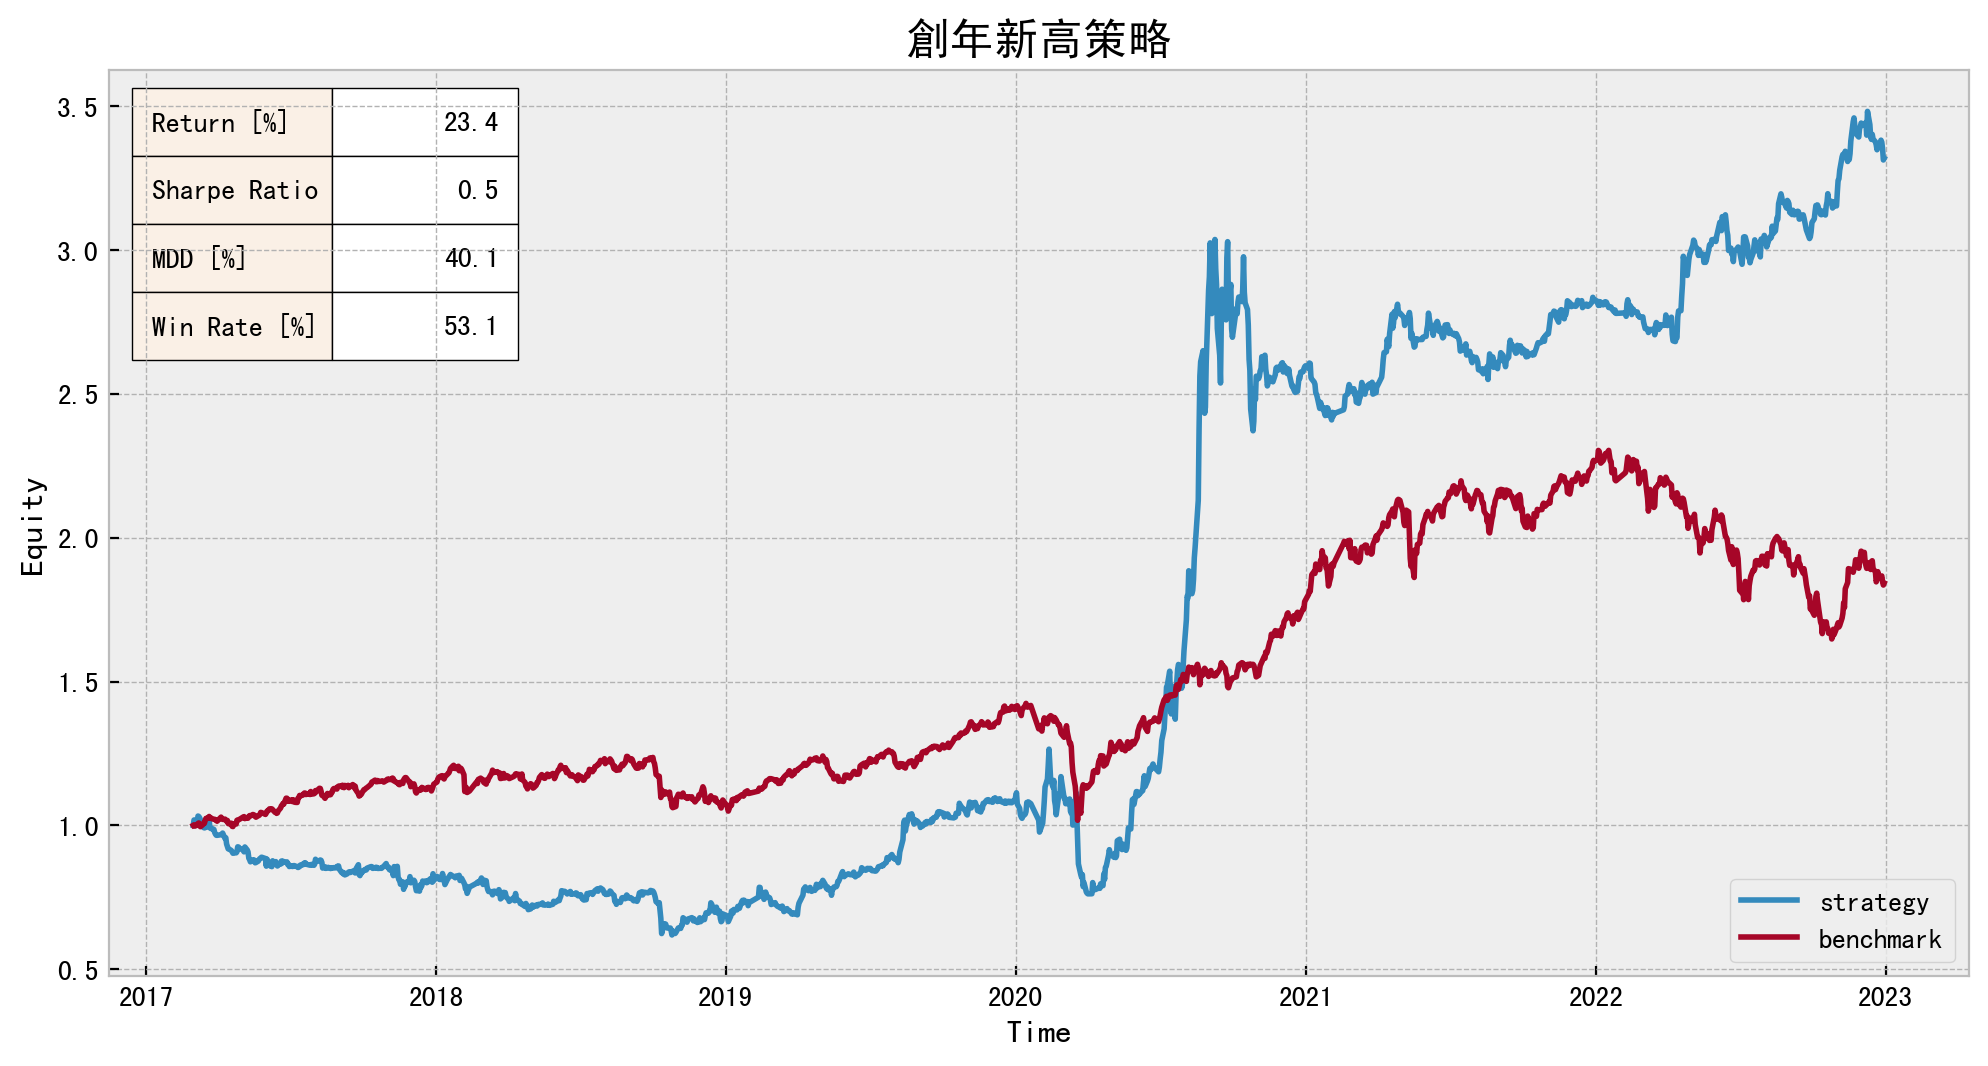

In [29]:
bt = bbq.setting(open, freq='M', nstocks=5, rank=-close, stop_loss=0.1)
position = bt.strategy(entries)
report = bt.sim(position)
report.plot(name='創年新高策略')

In [30]:
report.stats()

Start Date                    2017-03-01
End Date                      2022-12-30
Period [days]                       1436
Win Period [days]                    740
Total Return [%]                  231.95
Total Benchmark Return [%]         84.25
Return [%]                         23.44
Benchmark Return [%]               11.32
Volatility [%]                     46.28
MDD [%]                            40.08
MDD Duration [days]                  597
Total Trades                         309
Win Rate [%]                       53.07
Best Trade [%]                     56.62
Worst Trade [%]                    -8.36
Average Trade [%]                   0.91
Profit Factor                       2.09
Win Loss Ratio                      1.85
Sharpe Ratio                        0.47
Sortino Ratio                       0.63
Calmar Ratio                        0.58
dtype: object

In [31]:
report.trades()

,Asset,Entry Date,Exit Date,Entry Price,Exit Price,Weight,Return
0,2442,2017-03-01,2017-03-31,6.21,5.83,0.200000,-0.013408
1,5328,2017-03-01,2017-03-31,7.87,7.99,0.200000,0.001880
2,2022,2017-03-01,2017-04-12,9.51,8.28,0.200000,-0.027038
3,2025,2017-03-31,2017-04-17,3.60,3.19,0.250000,-0.029935
4,2516,2017-03-01,2017-05-02,7.50,6.88,0.333333,-0.029506
...,...,...,...,...,...,...,...
304,6153,2022-10-31,2022-11-30,23.25,27.25,0.200000,0.033239
305,9949,2022-10-31,2022-11-30,18.55,18.60,0.200000,-0.000631
306,5410,2022-11-30,2022-12-14,36.55,32.20,0.333333,-0.041622
307,3272,2022-11-30,2022-12-30,47.95,44.90,0.500000,-0.034729


In [32]:
report.best_trade()

Asset                9103
Entry Date     2020-01-31
Exit Date      2020-03-31
Entry Price          2.15
Exit Price           3.38
Weight                1.0
Return           0.566243
Name: 158, dtype: object

In [28]:
report.worst_trade()

Asset                3312
Entry Date     2018-10-01
Exit Date      2018-10-12
Entry Price          8.18
Exit Price           6.22
Weight           0.333333
Return           -0.08182
Name: 87, dtype: object